In [1]:
!pip install pandas
!pip install QuantLib

In [2]:
import pandas as pd
import QuantLib as ql

from app.service.YieldCurve.NoteBooks import NotebookHelper

%matplotlib inline

In [3]:


tenor_points = NotebookHelper.build_points(NotebookHelper.sofr_swaps)

{'benchmark_points': [{'tenor': '0 day', 'rate': 0.050694339}, {'tenor': '1 week', 'rate': 0.051482818}, {'tenor': '2 week', 'rate': 0.050516581}, {'tenor': '1 month', 'rate': 0.050693418}, {'tenor': '2 month', 'rate': 0.051183173}, {'tenor': '3 month', 'rate': 0.052179246}, {'tenor': '4 month', 'rate': 0.053034023}, {'tenor': '5 month', 'rate': 0.053390716}, {'tenor': '6 month', 'rate': 0.052693244}, {'tenor': '7 month', 'rate': 0.052695327}, {'tenor': '8 month', 'rate': 0.052394946}, {'tenor': '9 month', 'rate': 0.051137664}, {'tenor': '10 month', 'rate': 0.054207728}, {'tenor': '11 month', 'rate': 0.05471223}, {'tenor': '12 month', 'rate': 0.058945942}]}


In [4]:
settings = NotebookHelper.Settings()

settings.calendar = ql.UnitedStates(ql.UnitedStates.Settlement)
#settings.index = ql.OvernightIndex("Sofr", settings.settlement_days, ql.USDCurrency(), settings.calendar, settings.day_counter)

settings.target_day = settings.today + 95
settings.compounding_type = ql.Continuous

In [5]:

raw_index_tenor = []
raw_yield = []
helpers = ql.RateHelperVector()
for point in tenor_points['benchmark_points']:
    rate = point['rate']
    tenor = NotebookHelper.get_tenor(point['tenor'])

    raw_yield.append(rate)
    raw_index_tenor.append(settings.today + tenor)

df_raw_yields = pd.DataFrame(index=raw_index_tenor, columns=['Yield'], data=raw_yield)
display(df_raw_yields)


,Yield
"June 7th, 2023",0.050694
"June 14th, 2023",0.051483
"June 21st, 2023",0.050517
"July 7th, 2023",0.050693
"August 7th, 2023",0.051183
"September 7th, 2023",0.052179
"October 7th, 2023",0.053034
"November 7th, 2023",0.053391
"December 7th, 2023",0.052693
"January 7th, 2024",0.052695


<Axes: title={'center': 'Benchmark Rates'}, xlabel='Tenor', ylabel='Yield'>

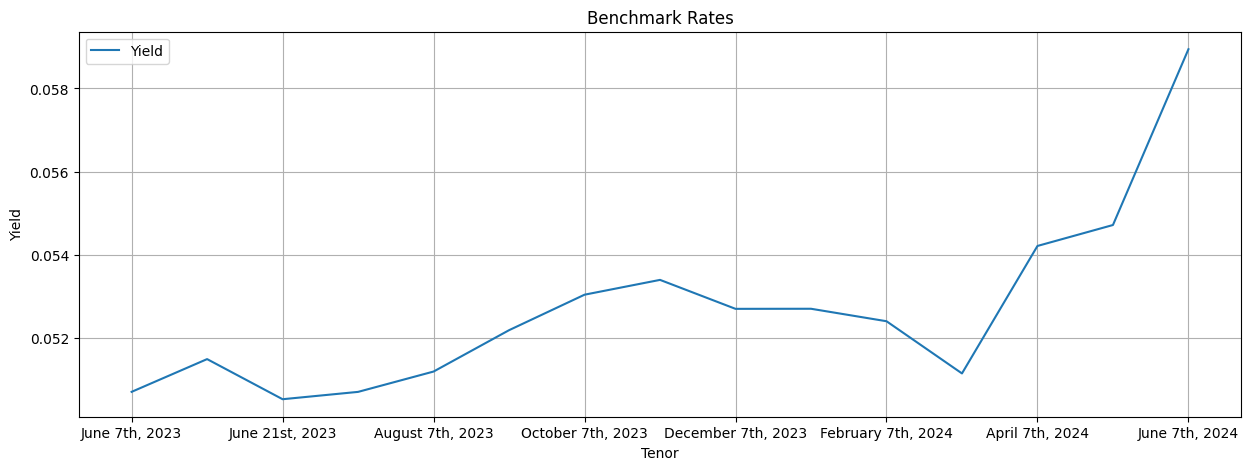

In [6]:
df_raw_yields.plot(figsize=(15,5), ylabel='Yield', xlabel='Tenor', grid=True, title='Benchmark Rates')

In [7]:
params = [raw_index_tenor, raw_yield, settings.day_counter, settings.calendar]

methods_curves = {
    "ZeroCurve": ql.ZeroCurve(*params),
    #"LogLinearZeroCurve": ql.LogLinearZeroCurve(*params),
    "CubicZeroCurve": ql.CubicZeroCurve(*params),
    "NaturalCubicZeroCurve": ql.NaturalCubicZeroCurve(*params),
    #"LogCubicZeroCurve": ql.LogCubicZeroCurve(*params),
    #"MonotonicCubicZeroCurve": ql.MonotonicCubicZeroCurve(*params)
}

df_index_tenors = pd.DataFrame(index=[row[0] for row in list(methods_curves.values())[0].nodes()])
[methods_curves[curve].enableExtrapolation() for curve in methods_curves]
end_date = list(methods_curves.values())[0].maxDate()
curve_dates = [ ql.Date(serial) for serial in range(settings.today.serialNumber(), end_date.serialNumber()+1) ]
index_curve_name = methods_curves.keys()

display(df_index_tenors)

""
"June 7th, 2023"
"June 14th, 2023"
"June 21st, 2023"
"July 7th, 2023"
"August 7th, 2023"
"September 7th, 2023"
"October 7th, 2023"
"November 7th, 2023"
"December 7th, 2023"
"January 7th, 2024"


0 - June 7th, 2023: 0.050694339
1 - June 14th, 2023: 0.051482818
2 - June 21st, 2023: 0.050516581
3 - July 7th, 2023: 0.050693418
4 - August 7th, 2023: 0.051183173
5 - September 7th, 2023: 0.052179246
6 - October 7th, 2023: 0.053034023
7 - November 7th, 2023: 0.053390716
8 - December 7th, 2023: 0.052693244
9 - January 7th, 2024: 0.052695327
10 - February 7th, 2024: 0.052394946
11 - March 7th, 2024: 0.051137664
12 - April 7th, 2024: 0.054207728
13 - May 7th, 2024: 0.05471223
14 - June 7th, 2024: 0.058945942


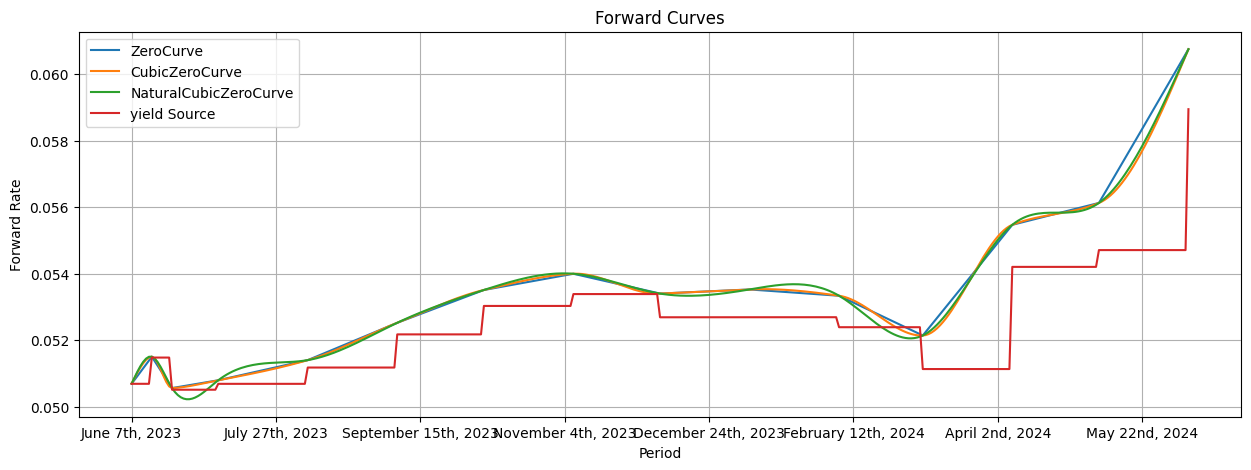

In [8]:
NotebookHelper.plot_forward_rates(curve_dates, methods_curves, settings, index_curve_name, df_raw_yields)

0 - June 7th, 2023: 0.050694339
1 - June 14th, 2023: 0.051482818
2 - June 21st, 2023: 0.050516581
3 - July 7th, 2023: 0.050693418
4 - August 7th, 2023: 0.051183173
5 - September 7th, 2023: 0.052179246
6 - October 7th, 2023: 0.053034023
7 - November 7th, 2023: 0.053390716
8 - December 7th, 2023: 0.052693244
9 - January 7th, 2024: 0.052695327
10 - February 7th, 2024: 0.052394946
11 - March 7th, 2024: 0.051137664
12 - April 7th, 2024: 0.054207728
13 - May 7th, 2024: 0.05471223
14 - June 7th, 2024: 0.058945942


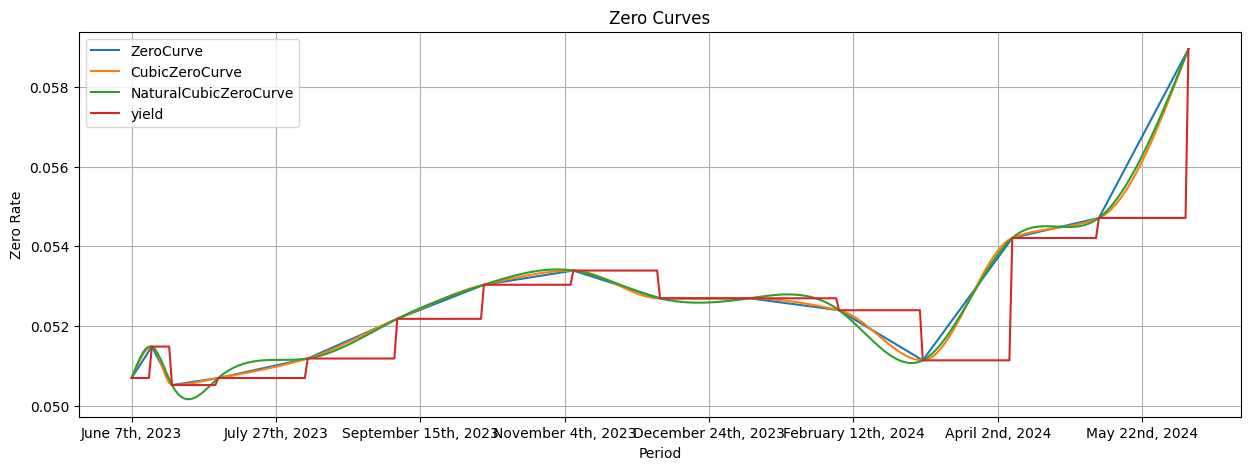

In [9]:
NotebookHelper.plot_zero_rates(curve_dates, methods_curves, settings, index_curve_name, df_raw_yields)

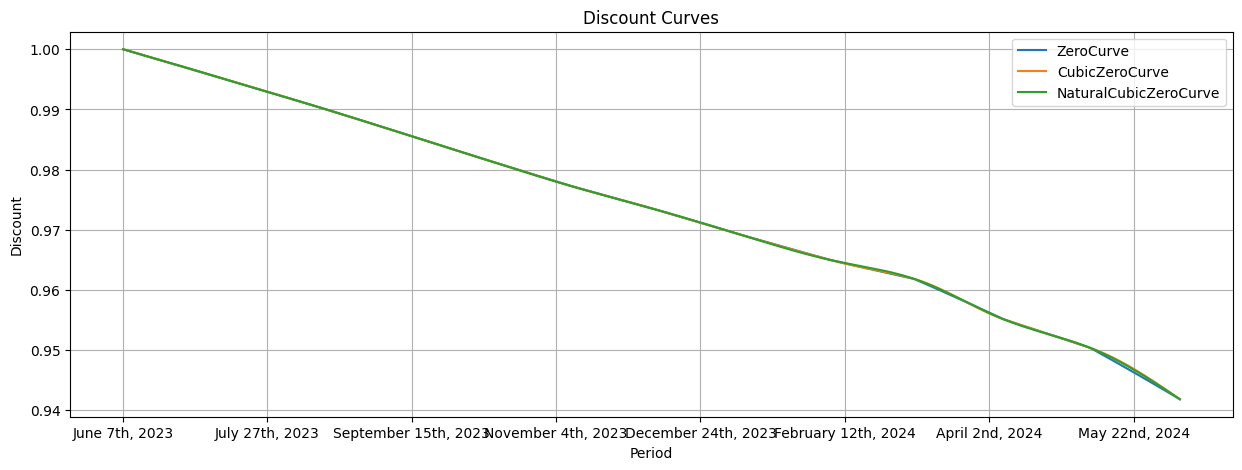

In [10]:
NotebookHelper.plot_discount(curve_dates, methods_curves, settings, index_curve_name)